<a href="https://colab.research.google.com/github/roilhi/MetNum_ITECI_2020/blob/gh-pages/L%C3%B3pezFrancisco_TrabajoFinalMetNum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Metodos Numericos**


## Universidad de Ensenada ITECI Ingeniería Industrial

ALUMNO: Francisco Javier López Rodríguez

Introduccion


*   En esta libreta de python podran encontrar un ejercicio de cada unidad vista durante la materia, se pueden encontrar ejercicios de ecuaciones y distintos metodos como el metodo de newton, interpolacion de newton, metodo de simpson 1/3 y metodo de Eliminación por Gauss-Jordan. cada uno con su error relatico como tambien podran observar la grafica de cada problema.

Objetivos


*   Aprender
*   Practicar
*   Programar

**2) Seleccionar un ejercicio de cada unidad:**

In [ ]:
# Primero importamos las librerías necesarias
import numpy as np #librería numérica 
import matplotlib.pyplot as plt #librería para las gráficas
import pandas as pd


1. **Unidad 1:** RAÍCES O SOLUCIONES DE ECUACIONES NO LINEALES:

**Metodo de Biseccion:** Hemos observado en el método gráfico que existe
una raíz entre los valores a y b si entre f(a) y f(b)
hay un cambio de signo.


En el método de bisección se divide a la mitad un intervalo [a, b]. Si hay un cambio
de signo se evalúa la función en el punto medio.

Cálculo del error relativo porcentual: 
$$\epsilon_r = \left \lvert \frac{V_r-Vn}{Vr}\right\rvert \times 100 $$

In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((vreal-vnum)/vreal)*100
  return epsilon

*   Método de bisección
Estimar la raíz de la función $f(x)=x-\cos(x)$ en el intervalo $[0.5, 1]$

In [ ]:
# Valores iniciales
a =0.5
b = 1
Vanalitico = 0.73909
def fx(x_int):
  fx = x_int-np.cos(x_int)
  return fx

In [ ]:
numIter = 0
N = int(input('Defina un numero N de iteraciones '))
x_old = 0
while numIter<N: 
  x_i = (a+b)/2
  if fx(a)*fx(x_i)<0:
    b = x_i
  elif fx(a)*fx(x_i)==0:
    raizAproxBisec = x_i
  else: 
    a = x_i
  numIter = numIter+1
  raizAproxBisec = x_i
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("La raíz estimada por el método de bisección es =",+raizAproxBisec, "iteración i=",+numIter)
  print("El error relativo es =",+ErrorBisec, "iteración i=",+numIter)

Defina un numero N de iteraciones 5
La raíz estimada por el método de bisección es = 0.75 iteración i= 1
El error relativo es = 100.0 iteración i= 1
La raíz estimada por el método de bisección es = 0.625 iteración i= 2
El error relativo es = 20.0 iteración i= 2
La raíz estimada por el método de bisección es = 0.6875 iteración i= 3
El error relativo es = 9.090909090909092 iteración i= 3
La raíz estimada por el método de bisección es = 0.71875 iteración i= 4
El error relativo es = 4.3478260869565215 iteración i= 4
La raíz estimada por el método de bisección es = 0.734375 iteración i= 5
El error relativo es = 2.127659574468085 iteración i= 5


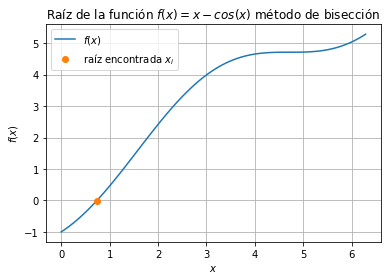

In [ ]:
# Datos para la graficación 
ejeX = np.linspace(0,2*np.pi,101)
# Graficando la función
plt.plot(ejeX,fx(ejeX), label='$f(x)$')
# Graficar la raíz encontrada en el método
plt.plot(raizAproxBisec,fx(raizAproxBisec),'o',label='raíz encontrada $x_i$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Raíz de la función $f(x)=x-cos(x)$ método de bisección')
plt.legend() #muestra la leyenda
plt.grid() #muestra la cuadrícula
plt.show() #Muestra la gráfica

In [ ]:
%%html
<a href="https://classroom.google.com/c/MTE2ODQ2NjE3NTcz/m/MTI2MDQ4OTAyODI1/details" target="_blank">video aquí sobre la explicacion de este tema en classroom</a>

2. **Unidad 2:** INTERPOLACIÓN Y REGRESIÓN NUMÉRICAS:

**Interpolacion de Newton:** Es de gran utilidad para la ingeniería el concepto de “interpolación”. Se
trata de trazar curvas que puedan “ajustar” o predecir una función
continua dado un registro de valores discretos.

Datos Discretos:

In [ ]:
import pandas as pd
datos = pd.DataFrame({ "i": [0, 1, 2, 3, 4, 5], "Xi" : [1.6, 2, 2.5, 3.2, 4, 4.5], "F(Xi)" : [2, 8, 14, 15, 8, 2]}, index=["X1", "X2", "X3", "X4", "X5", "X6"])
datos

,i,Xi,F(Xi)
X1,0,1.6,2
X2,1,2.0,8
X3,2,2.5,14
X4,3,3.2,15
X5,4,4.0,8
X6,5,4.5,2


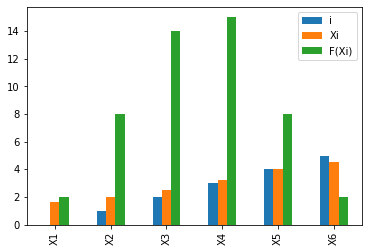

In [ ]:
datos.plot.bar()

*   Método de Interpolacíon de Newton:

N=1

Evaluar en la función $f(x)=f[x_1,x_0]=\frac{f(x_1)-f(x_0)}{x_1-x_0}=\frac{8-2}{2-1.6}=\frac{6}{0.4}=15$   

Evaluar en la función $f(x)=f[x_2,x_1]=\frac{f(x_2)-f(x_1)}{x_2-x_1}=\frac{14-8}{2.5-2}=\frac{6}{0.5}=12$

Evaluar en la función $f(x)=f[x_3,x_2]=\frac{f(x_3)-f(x_2)}{x_3-x_2}=\frac{15-14}{3.2-2.5}=\frac{1}{0.7}=1.4285$

N=2

Evaluar en la función $f(x)=f[x_2,x_1,x_0]=\frac{f(x_2,x_1)-f(x_1,x_0)}{x_2-x_0}=\frac{12-15}{12.5-1.6}=\frac{-3}{0.9}=-3.3333$

Evaluar en la función $f(x)=f[x_3,x_2,x_1]=\frac{f(x_3,x_2)-f(x_2,x_1)}{x_3-x_1}=\frac{1.4285-12}{3.2-2}=\frac{-10.5715}{1.2}=-8.8095$

N=3

Evaluar en la función  $f(x)=f[x_3,x_2,x_1,x_0]=\frac{f(x_3,x_2,x_1)-f(x_2,x_1,x_0)}{x_3-x_0}=\frac{-8.8095-(-3.3333)}{3.2-1.6}=\frac{-8.8095+3.3333}{1.6}=\frac{-5.4762}{1.6}-3.4226$

$b_1=f[x_1,x_0]=15$

$b_2=f[x_2,x_1,x_0]=-3.3333$

$b_3=f[x_3,x_2,x_1,x_0]=-3.4226$

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/watch?v=tzNWBdAWiao&t=1505s" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyr"<br>

In [ ]:
%%html
<a href="https://classroom.google.com/c/MTE2ODQ2NjE3NTcz/m/MTE4MzY5NzY3NTc2/details" target="_blank">video aquí sobre la explicacion de este tema en classroom</a>

3. **Unidad 3:** INTEGRACIÓN Y DIFERENCIACIÓN NUMERICAS:

**Método de simpson 1/3:** Se toma la ecuación de Newton-Cotes pero ahora la aproximación es
con un polinomio de orden 2 (parábola), este puede ser representado
por un polinomio de Lagrange.

$I=(b-a)\frac{f(x_0)+4f(x_1)+f(x_2)}{6}=$

$x_1=\frac{b-a}{2}=$

$x_1=\frac{1.57-0}{2}=\frac{1.57}{2}=0.785$

In [ ]:
import pandas as pd
datos = pd.DataFrame({ "X" : [0, 1.57, 0.785], "F(X)" : [9, 6, 8.12]}, index=["X0=","X2=", "X1="])
datos

,X,F(X)
X0=,0.000,9.00
X2=,1.570,6.00
X1=,0.785,8.12


$I=(1.57-0)\frac{9+4(8.12)+6}{6}= 12.4239$

$I= 12.4239$

Cálculo del error relativo porcentual: 
$$\epsilon_r = \left \lvert \frac{V_r-Vn}{Vr}\right\rvert \times 100 $$

In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((12.4247-12.4239)/12.4247)*100
  return epsilon

In [ ]:
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("El error relativo es =",+ErrorBisec)

El error relativo es = 0.006438787254419921


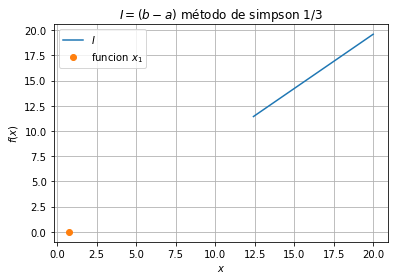

In [ ]:
# Datos para la graficación 
ejeX = (7.9133*1.57,20)
# Graficando la función
plt.plot(ejeX,fx(ejeX), label='$I$')
# Graficar la raíz encontrada en el método
plt.plot(raizAproxBisec,fx(raizAproxBisec),'o',label='funcion $x_1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("$I=(b-a)\frac{f(x_0)+4f(x_1)+f(x_2)}{6}=$ método de simpson 1/3")
plt.legend() #muestra la leyenda
plt.grid() #muestra la cuadrícula
plt.show() #Muestra la gráfica

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/watch?v=oDrpEQtf7Hc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyr"<br>

In [ ]:
%%html
<img width="500px" src="https://www.youtube.com/watch?v=oDrpEQtf7Hc&t=1s"></img>

In [ ]:
%%html
<a href="https://drive.google.com/file/d/1f43vOSorWx2JNkcli7lZfCjCY2DqtOwh/view" target="_blank">video aquí sobre la explicacion de este tema en classroom</a>

4. **Unidad 4:** SOLUCIÓN DE SISTEMAS DE ECUACIONES LINEALES:

Los sistemas de ecuaciones lineales están conformados por un conjunto
de expresiones de primer grado. Encontrar su solución, en ingeniería,
resuelve los siguientes problemas:



*   Encontrar las magnitudes de las fuerzas de reacción en un objeto o tensión de las cuerdas que sujetan a una masa para mantenerla en equilibro.

*   Encontrar las magnitudes de las corrientes eléctricas que
circulan a través de las mallas de un circuito eléctrico.

*   Encontrar la transformación de rotación en una imagen para girarla con cierto ángulo.

Sistema de Ecuaciones Visto en Clase:

$3x_1-0.1x_2-0.2x_3=7.85$

$0.1x_1+7x_2-0.3x_3=-19.3$

$0.3x_1-0.2x_2-10x_3=71.4$

In [ ]:
import pandas as pd
datos = pd.DataFrame({ "X1" : [3, -0.1, -0.2], "X2" : [0.1, 7, -0.3], "X3" : [0.3, -0.2, -10]}, index=["A", "A", "A"])
datos

,X1,X2,X3
A,3.0,0.1,0.3
A,-0.1,7.0,-0.2
A,-0.2,-0.3,-10.0


In [ ]:
import pandas as pd
datos = pd.DataFrame({ "X" : ["X1", "X2", "X3"]}, index=["X=", "X=", "X="])
datos

,X
X=,X1
X=,X2
X=,X3


In [ ]:
import pandas as pd
datos = pd.DataFrame({ "b": [7.85, -19.3, 71.4]}, index=["b=", "b=", "b="])
datos

,b
b=,7.85
b=,-19.30
b=,71.40


In [ ]:
import pandas as pd
datos = pd.DataFrame({ "(0)" : [0, 0, 0]}, index=["X1", "X2", "X3"])
datos

,(0)
X1,0
X2,0
X3,0


(1)

$X_1(1)=\frac{-(-0.1)(0)-(-0.2)(0)+7.85}3=2.61$

$X_2(1)=\frac{-(0.1)(0)-(-0.3)(0)-19.3}7=-2.75$

$X_3(1)=\frac{-(0.3)(0)-(-0.2)(0)+71.4}{10}=7.14$

(2)

$X_1(2)=\frac{-(-0.1)(-2.75)-(-0.2)(7.14)+7.85}3=3.00$

$X_2(2)=\frac{-(0.1)(2.61)-(-0.3)(7.14)-19.3}7=-2.48$

$X_3(2)=\frac{-(0.3)(2.61)-(-0.2)(-2.75)+71.4}{10}=7.05$

Cálculo del error relativo porcentual: 
$$\epsilon_r = \left \lvert \frac{V_r-Vn}{Vr}\right\rvert \times 100 $$

In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((3-2.61)/3)*100
  return epsilon

In [ ]:
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("Er1= El error relativo es =",+ErrorBisec)

Er1= El error relativo es = 13.000000000000004


In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((-2.48+2.75)/-2.48)*100
  return epsilon

In [ ]:
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("Er2= El error relativo es =",+ErrorBisec)

Er2= El error relativo es = 10.88709677419355


In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((7-7.14)/7)*100
  return epsilon

In [ ]:
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("Er3= El error relativo es =",+ErrorBisec)

Er3= El error relativo es = 1.9999999999999956


(3)

$X_1(3)=\frac{-(-0.1)(-2.48)-(-0.2)(7)+7.85}3=3.00$

$X_2(3)=\frac{-(0.1)(3)-(-0.3)(7)-19.3}7=-2.5$

$X_3(3)=\frac{-(0.3)(3)-(-0.2)(-2.48)+71.4}{10}=7$

Cálculo del error relativo porcentual: 
$$\epsilon_r = \left \lvert \frac{V_r-Vn}{Vr}\right\rvert \times 100 $$

In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((3.7690-3)/3.7690)*100
  return epsilon

In [ ]:
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("Er1= El error relativo es =",+ErrorBisec)

Er1= El error relativo es = 20.40328999734678


In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((-2.48+2.5)/-2.48)*100
  return epsilon

In [ ]:
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("Er2= El error relativo es =",+ErrorBisec)

Er2= El error relativo es = 0.8064516129032264


In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((7.05-7)/7.05)*100
  return epsilon

In [ ]:
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("Er3= El error relativo es =",+ErrorBisec)

Er3= El error relativo es = 0.7092198581560258


(4)

$X_1(4)=\frac{-(-0.1)(-2.5)-(-0.2)(7)+7.85}3=3.76$

$X_2(4)=\frac{-(0.1)(3.76)-(-0.3)(7)-19.3}7=-2.5$

$X_3(4)=\frac{-(0.3)(3.76)-(-0.2)(-2.5)+71.4}{10}=6.9772$

Cálculo del error relativo porcentual: 
$$\epsilon_r = \left \lvert \frac{V_r-Vn}{Vr}\right\rvert \times 100 $$

In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((3-3.76)/3)*100
  return epsilon

In [ ]:
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("Er1= El error relativo es =",+ErrorBisec)

Er1= El error relativo es = 25.333333333333325


In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((-2.5+2.503)/-2.5)*100
  return epsilon

In [ ]:
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("Er2= El error relativo es =",+ErrorBisec)

Er2= El error relativo es = 0.12000000000000455


In [ ]:
# Función que calcule el error relativo porcentual
def ErrorRelativo(vreal,vnum):
  epsilon = abs((6.97-7)/6.97)*100
  return epsilon

In [ ]:
  ErrorBisec = ErrorRelativo(raizAproxBisec,x_old)
  x_old = x_i
  print("Er= El error relativo es =",+ErrorBisec)

Er= El error relativo es = 0.43041606886657463


In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/watch?v=UV6WYhthq7k" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyr"<br>

In [ ]:
%%html
<img width="500px" src="https://www.youtube.com/watch?v=UV6WYhthq7k"></img>

In [ ]:
%%html
<a href="https://drive.google.com/file/d/1K7d7cEYDo17i0L49UTXkNIJFe2o2TJs5/view" target="_blank">video aquí sobre la explicacion de este tema en classroom</a>

#Tipos de Variables#



*   print ("hola")





*   Celda





*   Todo lo que esta entre comillas (" ")





*   Ha estos se les conoce como punto flotante





*   Ha estos se les conoce como numeros enteros





*   Los booleanos son





*   Esta es la forma correcta para agregar una ecuacion



Los superindices se ponen con este simbolo ^



*   Los Subindices se ponen con el guion bajo (_)





*   La diagonal invertida $\pi





*   Para las fracciones \frac





*   \pm





*   \sqrt





*   \times



*   \geq

*   \leq



*   \int



#Conclusión:



*   Mi conclusión es que para ser un buen programador se necesita más que 1 mes de clases, creo que cumplí con los objetivos de este trabajo, aunque es muy importante mencionar que me hace falta mucho por aprender. Google colab es una herramienta de programación muy interesante, me gustaría no dejar esto por terminado, si no, seguir buscando información o tutoriales de programación en este tipo de programas, ya que son de demasiada utilidad en la carrera como ingeniero industrial, creo que tener una buena habilidad en esta herramienta me dará un plus en mi experiencia laboral.



#Observaciones del curso:



*   Logré observar que fue un curso muy rápido, pero bien aprovechado, al principio le batallé un poco, pero a como fueron pasando los días pude mejorar en mis trabajos. Es muy importante mencionar que el docente que impartió este curso estuvo con toda la disponibilidad de aclararnos dudas y fue muy tolerante con la entrega de trabajos. Por ultimo quiero dar gracias por el esfuerzo del profe de apoyarnos en sus tiempos libres para contestar dudas y resolver las mismas.



#FIN DEL DOCUMENTO